In [156]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Here we will import the required libraries

In [157]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Now we will read the csv file to get the dataset

In [158]:
df.shape

(891, 12)

There are 891 rows and 12 columns in our dataset

In [159]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Here we will describe our dataset

In [160]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are null values present in our dataset

In [161]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)


In [162]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [163]:
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)


Here we will remove the null values from data set with the mode of the same.


In [164]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Now we can see there are no null values available in our dataset

In [165]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


Here we have used df.head to review the dataset from the upward direction

In [166]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Here we are replacing the zero with the mean

In [167]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)

Categorical Columns:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


Numerical Columns:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


Now we are categorising thw data into 2 different types that are categorical data and numerical data

<AxesSubplot:>

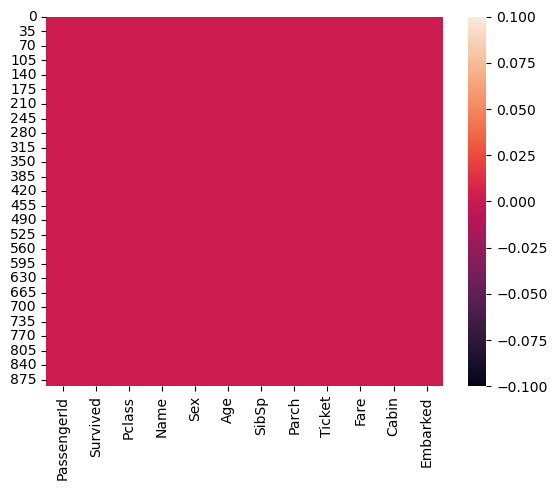

In [168]:
sns.heatmap(df.isnull())

By using heatmap plot we can verify the null values of the dataset

In [169]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.657753
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

Here we can see the skewness in data SibSp, Parch, and fare therefore need to reduce the skewness

In [170]:
df['SibSp'] = np.cbrt(df['SibSp'])

In [171]:
df['Parch'] = np.cbrt(df['Parch'])

In [172]:
df['Fare'] = np.cbrt(df['Fare'])

In [173]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.657753
SibSp          1.033059
Parch          1.348334
Fare           1.230382
dtype: float64

Here we have reduced the skewness in dataset

In [174]:
df['SibSp'] = np.cbrt(df['SibSp'])
df['Parch'] = np.cbrt(df['Parch'])
df['Fare'] = np.cbrt(df['Fare'])

In [175]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.657753
SibSp          0.805580
Parch          1.237529
Fare          -2.950107
dtype: float64

In [176]:
df['SibSp'] = np.cbrt(df['SibSp'])
df['Parch'] = np.cbrt(df['Parch'])
df['Fare'] = np.cbrt(df['Fare'])

In [177]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.657753
SibSp          0.786890
Parch          1.226942
Fare          -6.719420
dtype: float64

In [178]:
df['SibSp'] = np.cbrt(df['SibSp'])
df['Parch'] = np.cbrt(df['Parch'])
df['Fare'] = np.cbrt(df['Fare'])

In [179]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.657753
SibSp          0.785042
Parch          1.225826
Fare          -7.430483
dtype: float64

We have tried to reduce the skewness from the dataset at its possible level

In [180]:
df.drop(['Name'], axis=1, inplace=True)
df.drop(['Sex'], axis=1, inplace=True)


In [181]:
df.drop(['Ticket'], axis=1, inplace=True)


In [182]:
df.drop(['Cabin'], axis=1, inplace=True)


In [183]:
df.drop(['PassengerId'], axis=1, inplace=True)


We will drop the unnecassary columns from the dataset so that data will be more clear to understand

In [184]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,28.566970,0.318802,0.240121,1.019617
std,0.486592,0.836071,13.199572,0.467560,0.428654,0.134032
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,1.025862
50%,0.000000,3.000000,24.000000,0.000000,0.000000,1.033525
75%,1.000000,3.000000,35.000000,1.000000,0.000000,1.043306
max,1.000000,3.000000,80.000000,1.026004,1.022367,1.080068


In [185]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1.0,0.0,1.024758,S
1,1,1,38.0,1.0,0.0,1.054087,C
2,1,3,26.0,0.0,0.0,1.025885,S
3,1,1,35.0,1.0,0.0,1.050262,S
4,0,3,35.0,0.0,0.0,1.026083,S


Checking that the deletd columns are not present again in the dataset

In [186]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [190]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1.0,0.0,1.024758,S
1,1,1,38.0,1.0,0.0,1.054087,C
2,1,3,26.0,0.0,0.0,1.025885,S
3,1,1,35.0,1.0,0.0,1.050262,S
4,0,3,35.0,0.0,0.0,1.026083,S


In [192]:
df.Embarked= df.Embarked.fillna('none')
df


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1.0,0.000000,1.024758,S
1,1,1,38.0,1.0,0.000000,1.054087,C
2,1,3,26.0,0.0,0.000000,1.025885,S
3,1,1,35.0,1.0,0.000000,1.050262,S
4,0,3,35.0,0.0,0.000000,1.026083,S
...,...,...,...,...,...,...,...
886,0,2,27.0,0.0,0.000000,1.032173,S
887,1,1,19.0,0.0,0.000000,1.042884,S
888,0,3,24.0,1.0,1.008594,1.039717,S
889,1,1,26.0,0.0,0.000000,1.042884,C


In [193]:
from sklearn.preprocessing import OrdinalEncoder

In [195]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [196]:
ord_encoder= OrdinalEncoder(categories=[['S','C','Q','none']])
df1= ord_encoder.fit_transform(df[['Embarked']])
df1

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

In [198]:
df['Embarked']= df1
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1.0,0.0,1.024758,0.0
1,1,1,38.0,1.0,0.0,1.054087,1.0
2,1,3,26.0,0.0,0.0,1.025885,0.0
3,1,1,35.0,1.0,0.0,1.050262,0.0
4,0,3,35.0,0.0,0.0,1.026083,0.0


Converted the Embarked columns from categorical to numerical so that we can handle the error in our dataset

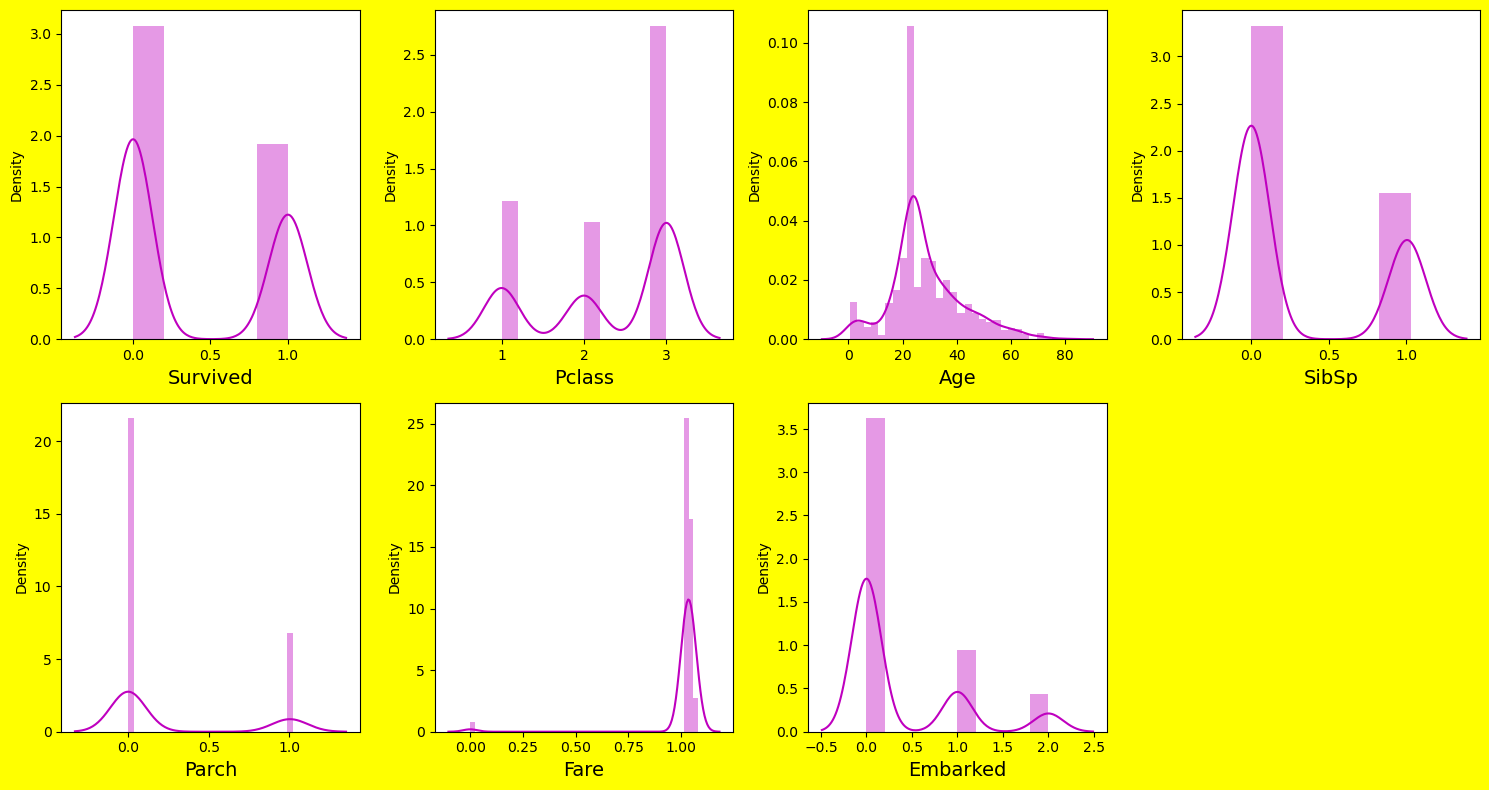

In [199]:
plt.figure(figsize=(15,8), facecolor= "yellow")
plotnumber=1
for col in df:
    if plotnumber<=9:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[col], color="m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+=1
        plt.tight_layout()

By using the distplot map we can verify that we have skewness in our dataset, with the help of distplot we can easily check the skewness

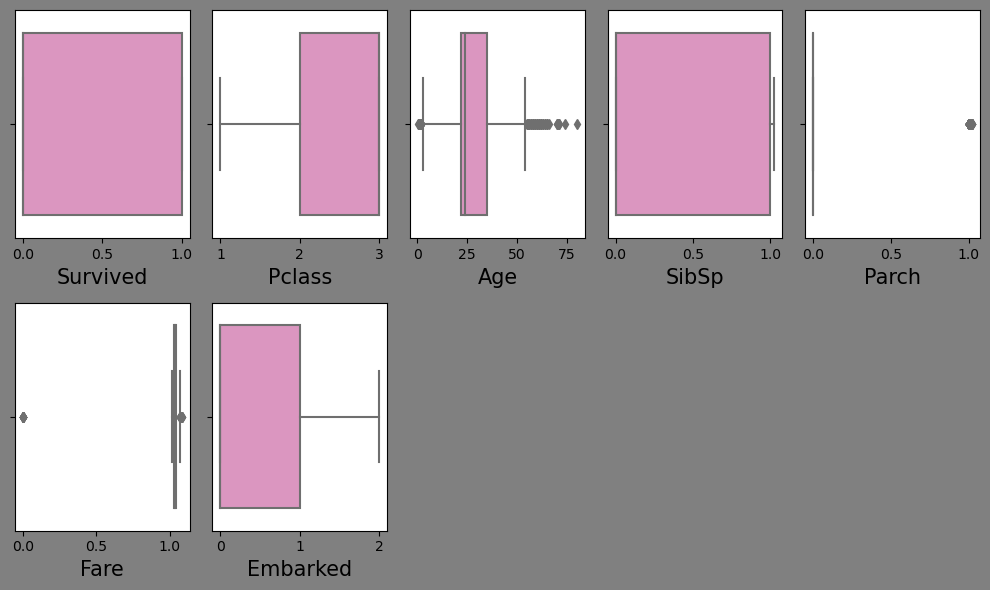

In [200]:
plt.figure(figsize=(10,6), facecolor= 'Grey')
plotnumber=1
for col in df:
    if plotnumber<=10:
        ax=plt.subplot(2,5, plotnumber)
        sns.boxplot(df[col], palette="Set2_r")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+=1
    plt.tight_layout()

By using boxlot we can check the outliers and skewness in the dataset

In [202]:
cor= df.corr()
cor

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.052872,0.114517,0.146973,0.113831,0.106811
Pclass,-0.338481,1.000000,-0.356187,-0.074353,-0.027106,-0.008121,0.045702
Age,-0.052872,-0.356187,1.000000,-0.131253,-0.232123,0.006561,-0.047625
SibSp,0.114517,-0.074353,-0.131253,1.000000,0.422216,0.123977,-0.028024
Parch,0.146973,-0.027106,-0.232123,0.422216,1.000000,0.106024,-0.066503
Fare,0.113831,-0.008121,0.006561,0.123977,0.106024,1.000000,0.072974
Embarked,0.106811,0.045702,-0.047625,-0.028024,-0.066503,0.072974,1.000000


Data is not highly skewed so we can proceed further as data is clean

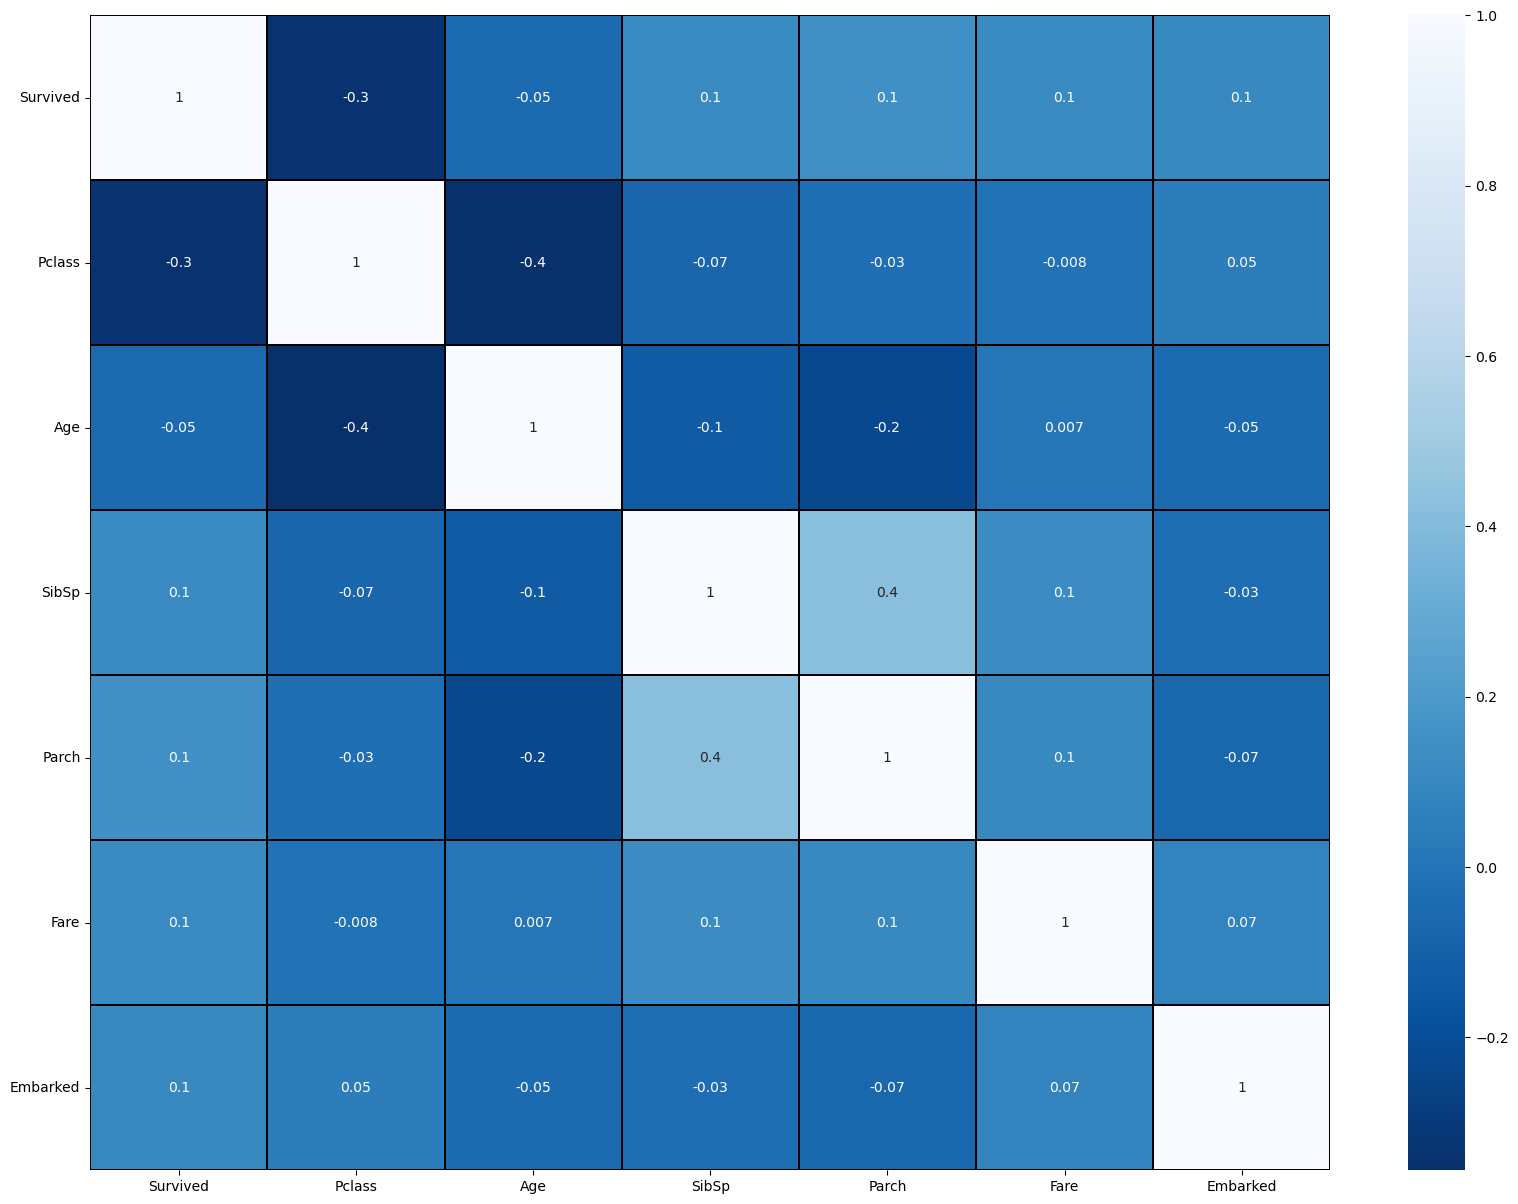

In [203]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1g", linecolor="black", annot= True, cmap= "Blues_r")
plt.yticks(rotation=0);
plt.show()

Here we are using the heatmap plot to veriy the correlation in the dataset. We can see that target variable have the correlation with the other data.

In [204]:
x=df.drop("Survived", axis=1)
y=df["Survived"]

We will set our target variable in y-axis and rest other in x-axis

In [205]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0.827377,-0.497793,1.457739,-0.560488,0.038382,-0.568837
1,-1.566107,0.715048,1.457739,-0.560488,0.257322,1.005181
2,0.827377,-0.194583,-0.682223,-0.560488,0.046794,-0.568837
3,-1.566107,0.487640,1.457739,-0.560488,0.228766,-0.568837
4,0.827377,0.487640,-0.682223,-0.560488,0.048274,-0.568837
...,...,...,...,...,...,...
886,-0.369365,-0.118780,-0.682223,-0.560488,0.093731,-0.568837
887,-1.566107,-0.725201,-0.682223,-0.560488,0.173693,-0.568837
888,0.827377,-0.346188,1.457739,1.793766,0.150053,-0.568837
889,-1.566107,-0.194583,-0.682223,-0.560488,0.173693,1.005181


In [206]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [207]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.172508,Pclass
1,1.239077,Age
2,1.238793,SibSp
3,1.286044,Parch
4,1.027902,Fare
5,1.016199,Embarked


We are using VIF in our dataset

In [208]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

Again we will import the required liabraries

In [212]:
RFC=RandomForestClassifier()
RFC.fit(X_train, y_train)
predRFC=RFC.predict(X_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC)) 
print(classification_report(y_test, predRFC))

0.7597765363128491
[[84 21]
 [22 52]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       105
           1       0.71      0.70      0.71        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



We are using RFC means RandomForestClassifier model for our dataset.

In [214]:
GB=GradientBoostingClassifier() 
GB.fit(X_train, y_train)
predGB=GB.predict(X_test)
print(accuracy_score(y_test, predGB)) 
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.7039106145251397
[[96  9]
 [44 30]]
              precision    recall  f1-score   support

           0       0.69      0.91      0.78       105
           1       0.77      0.41      0.53        74

    accuracy                           0.70       179
   macro avg       0.73      0.66      0.66       179
weighted avg       0.72      0.70      0.68       179



We are using GradientBoostingClassifier model in our dataset

In [215]:
ET = ExtraTreesClassifier()
ET.fit(X_train, y_train) 
predET=ET.predict(X_test)
print(accuracy_score(y_test, predET)) 
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.7318435754189944
[[81 24]
 [24 50]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       105
           1       0.68      0.68      0.68        74

    accuracy                           0.73       179
   macro avg       0.72      0.72      0.72       179
weighted avg       0.73      0.73      0.73       179



Here we are using ExtraTreesClassifier model for our dataset

In [216]:
from sklearn.model_selection import cross_val_score

In [217]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion': ['gini', 'entropy'], 
              'random_state':[10, 50, 1000], 
              'max_depth':[0, 10, 20],
            'n_jobs':[-2, -1, 1],
              'n_estimators':[50, 100, 200, 300]}

In [218]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters, cv=5)

In [219]:
import joblib
joblib.dump(ET,"Survived.pkl")

['Survived.pkl']

In [221]:
model = joblib.load("Survived.pkl")
prediction = model.predict(X_test)
prediction

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [222]:
a = np.array(y_test) 
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"]=a
df

,Predicted,Original
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
174,0,0
175,0,0
176,0,1
177,0,1


Finally we have predicted the Survivied from the datset, prediction is almost nearby the original survival numbers which means our prediction is nearly correct.